In [2]:
pip install scikit-learn

In [3]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Notebooks/OCR_course/data/Book1.csv')

In [6]:
df.tail()

Image Label       Unnamed: 2
41  35.jpg    Gn               Gn
42  36.jpg    Sk  ශර්කරා දී කල්කය
43  37.jpg    BL       බලා රිෂ්ටය
44  38.jpg    LE               LE
45  39.jpg    Cu               CU

In [7]:
dir = '/content/drive/MyDrive/Notebooks/OCR_course/data/dataset'

In [8]:
img_size_w =50
img_size_h =20

img_list = []

for img in os.listdir(dir):
  img_array =cv2.imread(os.path.join(dir,img),cv2.IMREAD_GRAYSCALE)
  new_array =cv2.resize(img_array, (img_size_w,img_size_h))
  img_list.append((img,new_array))

In [9]:
#print(img_list[0])

In [10]:
def get_array(name):
  for image,array in img_list:
    if name == image:
      return array

In [11]:
df['Array'] = df['Image'].apply(get_array)

In [12]:
df.tail()

Image Label       Unnamed: 2  \
41  35.jpg    Gn               Gn   
42  36.jpg    Sk  ශර්කරා දී කල්කය   
43  37.jpg    BL       බලා රිෂ්ටය   
44  38.jpg    LE               LE   
45  39.jpg    Cu               CU   

                                                Array  
41  [[144, 141, 143, 129, 138, 138, 131, 134, 131,...  
42  [[150, 140, 139, 151, 139, 144, 146, 152, 148,...  
43  [[114, 106, 116, 124, 118, 126, 119, 123, 115,...  
44  [[179, 173, 163, 173, 171, 169, 170, 168, 171,...  
45  [[136, 132, 141, 141, 131, 126, 124, 129, 128,...

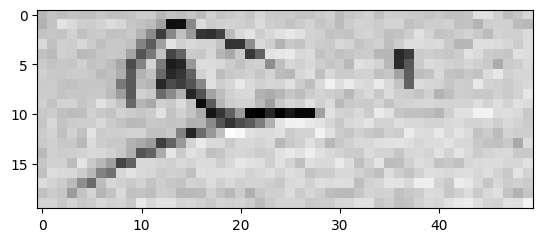

In [13]:
plt.imshow(img_list[1][1], cmap='gray')

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [15]:
df['Label Class'] = df['Label']

In [16]:
label_encoder = LabelEncoder()
df['Label Class'] = label_encoder.fit_transform(df['Label Class'])

In [17]:
print ('total Classes', label_encoder.classes_)
print ('total length of classes' , len(label_encoder.classes_))
output_Classes = len(label_encoder.classes_)

total Classes ['/' '1.25 qty' '15ml' '2' '2 pills' '300ml' '30ml' '60ml' '7.5ml' 'AJ'
 'AS' 'Ar' 'Av' 'BL' 'CE' 'Ch' 'Cu' 'Gn' 'I'
 'I Ar / BL Pp 7.5ml bd,II Ch Av 1.25qty,III Sp Gn Rb 2pills,IV TL Ko 60ml AS AJ Tp'
 'I As / Pp 7.5ml bd Pn,II Ch Av 1.25 qty,III Tp Gn Rb 2 pills'
 'I As / Pp Ar AJ 7.5ml bd,II Ch Sd 1.25qty,III TL,IV Pd 60ml'
 'I Ch / Pp 1.25qty bd,II Qw Pn 15ml, III Tp'
 'I Ch / TL 1.25qty bd,II Sd,III Gn Sk 2pills'
 'I Ch / Tp 1.25qty bd,II Sp, III CE LK 2pct,IV TL Ko Pd 30ml'
 'I LE / Cu 2pct,II TL AL 300ml,III Ch Tp 1.25qty bd' 'II' 'III' 'IV' 'Ko'
 'LE' 'LK' 'Ni' 'Pd' 'Pn' 'Pp' 'Qw' 'Rb' 'Sd' 'Sk' 'Sp' 'TL' 'Tp' 'bd'
 'pct' '}']
total length of classes 46


In [18]:
Label_classes = label_encoder.classes_
print(Label_classes)

['/' '1.25 qty' '15ml' '2' '2 pills' '300ml' '30ml' '60ml' '7.5ml' 'AJ'
 'AS' 'Ar' 'Av' 'BL' 'CE' 'Ch' 'Cu' 'Gn' 'I'
 'I Ar / BL Pp 7.5ml bd,II Ch Av 1.25qty,III Sp Gn Rb 2pills,IV TL Ko 60ml AS AJ Tp'
 'I As / Pp 7.5ml bd Pn,II Ch Av 1.25 qty,III Tp Gn Rb 2 pills'
 'I As / Pp Ar AJ 7.5ml bd,II Ch Sd 1.25qty,III TL,IV Pd 60ml'
 'I Ch / Pp 1.25qty bd,II Qw Pn 15ml, III Tp'
 'I Ch / TL 1.25qty bd,II Sd,III Gn Sk 2pills'
 'I Ch / Tp 1.25qty bd,II Sp, III CE LK 2pct,IV TL Ko Pd 30ml'
 'I LE / Cu 2pct,II TL AL 300ml,III Ch Tp 1.25qty bd' 'II' 'III' 'IV' 'Ko'
 'LE' 'LK' 'Ni' 'Pd' 'Pn' 'Pp' 'Qw' 'Rb' 'Sd' 'Sk' 'Sp' 'TL' 'Tp' 'bd'
 'pct' '}']


In [19]:
import pickle

# Specify the file path with the .pkl extension
output_file_path = 'label_encoder.pkl'

# Saving the object to a file using pickle
with open(output_file_path, 'wb') as f:
    pickle.dump(label_encoder, f)


In [20]:
df.tail()

Image Label       Unnamed: 2  \
41  35.jpg    Gn               Gn   
42  36.jpg    Sk  ශර්කරා දී කල්කය   
43  37.jpg    BL       බලා රිෂ්ටය   
44  38.jpg    LE               LE   
45  39.jpg    Cu               CU   

                                                Array  Label Class  
41  [[144, 141, 143, 129, 138, 138, 131, 134, 131,...           17  
42  [[150, 140, 139, 151, 139, 144, 146, 152, 148,...           39  
43  [[114, 106, 116, 124, 118, 126, 119, 123, 115,...           13  
44  [[179, 173, 163, 173, 171, 169, 170, 168, 171,...           30  
45  [[136, 132, 141, 141, 131, 126, 124, 129, 128,...           16

In [21]:
print(df.columns)


Index(['Image', 'Label', 'Unnamed: 2', 'Array', 'Label Class'], dtype='object')


In [22]:
onehot = OneHotEncoder()
labels = onehot.fit_transform(df['Label Class'].values.reshape(-1, 1)).toarray()


In [23]:
print(labels[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:

training_set =df['Array']
train_set = []
for img in training_set:
  img = img.reshape(img_size_w,img_size_h,1)
  train_set.append(img)
train_set = np.array(train_set)





In [25]:
train_set.shape

(46, 50, 20, 1)

In [26]:
train_labels = df['Label Class'].values


In [27]:
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten, Dropout, MaxPooling2D,BatchNormalization,GlobalMaxPooling2D
from tensorflow.keras.models import Model

i = Input(shape=(img_size_w,img_size_h,1))
x = Conv2D(32,(3,3),activation = 'relu', padding ='same') (i)
x= BatchNormalization()(x)
x = Conv2D(32,(3,3),activation = 'relu', padding ='same') (x)
x= BatchNormalization()(x)
x= MaxPooling2D((2,2))(x)
x=Dropout(0.2)(x)


x = Conv2D(64,(3,3),activation = 'relu', padding ='same') (x)
x= BatchNormalization()(x)
x = Conv2D(64,(3,3),activation = 'relu', padding ='same') (x)
x= BatchNormalization()(x)
x= MaxPooling2D((2,2))(x)
x=Dropout(0.2)(x)


x = GlobalMaxPooling2D()(x)

x= Flatten()(x)

x = Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(output_Classes,activation='softmax')(x)



In [28]:
model = Model(i,x)

In [29]:
model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
print(len(train_set))
print(len(labels))


46
46


In [31]:
train_set_length = len(train_set)
labels_length = len(labels)

print(f"Number of samples in train_set: {train_set_length}")
print(f"Number of samples in labels: {labels_length}")

if train_set_length != labels_length:
    print("Mismatch: The number of samples in train_set and labels is different.")
else:
    print("No mismatch: The number of samples in train_set and labels is the same.")


Number of samples in train_set: 46
Number of samples in labels: 46
No mismatch: The number of samples in train_set and labels is the same.


In [32]:
train_set_length = len(train_set)
labels_length = len(labels)

print(f"Number of samples in train_set: {train_set_length}")
print(f"Number of samples in labels: {labels_length}")


Number of samples in train_set: 46
Number of samples in labels: 46


In [33]:
r = model.fit(train_set,labels, epochs=500, batch_size=42,validation_split=0.2)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 5.8795 - accuracy: 0.0556 - val_loss: 8.5443 - val_accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 310ms/step - loss: 4.5986 - accuracy: 0.0000e+00 - val_loss: 9.1024 - val_accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 414ms/step - loss: 4.6366 - accuracy: 0.0000e+00 - val_loss: 10.1484 - val_accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 1s 507ms/step - loss: 4.3161 - accuracy: 0.0278 - val_loss: 10.9798 - val_accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 1s 529ms/step - loss: 4.1131 - accuracy: 0.0556 - val_loss: 11.6770 - val_accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 1s 530ms/step - loss: 4.0734 - accuracy: 0.0833 - val_loss: 12.2854 - val_accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 1s 537ms/step - loss: 4.0215 - accuracy: 0.0556 - val_loss: 13.0425 - 

In [34]:
model.save('handwrite_model.h5')

In [35]:
img = '/content/drive/MyDrive/Notebooks/OCR_course/data/dataset/39.jpg'

In [36]:
img_array = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array,(img_size_w,img_size_h))
array = new_array.reshape(-1,img_size_w,img_size_h,1)
pred =model.predict(array)
y=np.argmax(pred)

1/1 [==============================] - 0s 160ms/step


In [37]:
print(y)
label_encoder.classes_[y]

2


'15ml'

In [38]:
import cv2
import numpy as np

# Assuming img_size_w, img_size_h, model, and label_encoder are defined as before
# dir is the path to the directory containing all the images you want to predict
dir = '/content/drive/MyDrive/Notebooks/OCR_course/data/dataset'

predicted_values = []

for img_name in os.listdir(dir):
    # Load and preprocess the image
    img_path = os.path.join(dir, img_name)
    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size_w, img_size_h))
    array = new_array.reshape(-1, img_size_w, img_size_h, 1)

    # Make prediction using the model
    pred = model.predict(array)

    # Get the predicted class index
    y = np.argmax(pred)

    # Get the corresponding class label from label_encoder.classes_
    predicted_class = label_encoder.classes_[y]

    # Append the predicted class label to the list
    predicted_values.append(predicted_class)

print(predicted_values)


1/1 [==============================] - 0s 38ms/step
['1.25 qty', 'I', 'bd', '2 pills', 'Ko', 'Qw', 'Sd', '2 pills', 'Pn', 'Ar', '2 pills', 'TL', 'AJ', 'Pd', 'III', 'Sd', '15ml', '2', 'pct', 'II', 'LK', '1.25 qty', 'Tp', 'Qw', '15ml', 'Ch', 'CE', '15ml', 'Sp', 'CE', '2 pills', '60ml', '15ml', '/', '7.5ml', 'I LE / Cu 2pct,II TL AL 300ml,III Ch Tp 1.25qty bd', '}', 'I Ch / TL 1.25qty bd,II Sd,III Gn Sk 2pills', 'I Ch / Pp 1.25qty bd,II Qw Pn 15ml, III Tp', 'I As / Pp 7.5ml bd Pn,II Ch Av 1.25 qty,III Tp Gn Rb 2 pills', 'I As / Pp Ar AJ 7.5ml bd,II Ch Sd 1.25qty,III TL,IV Pd 60ml', 'I Ch / Tp 1.25qty bd,II Sp, III CE LK 2pct,IV TL Ko Pd 30ml', 'I Ar / BL Pp 7.5ml bd,II Ch Av 1.25qty,III Sp Gn Rb 2pills,IV TL Ko 60ml AS AJ Tp', 'AS', 'Pp', 'IV']


1/1 [==============================] - 0s 35ms/step


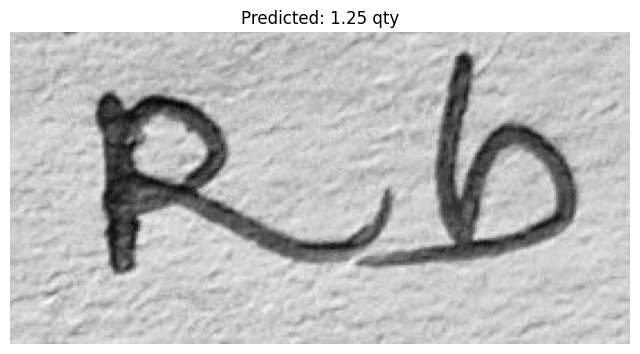

1/1 [==============================] - 0s 23ms/step


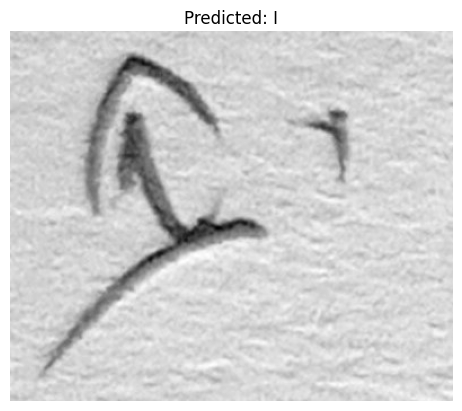

1/1 [==============================] - 0s 24ms/step


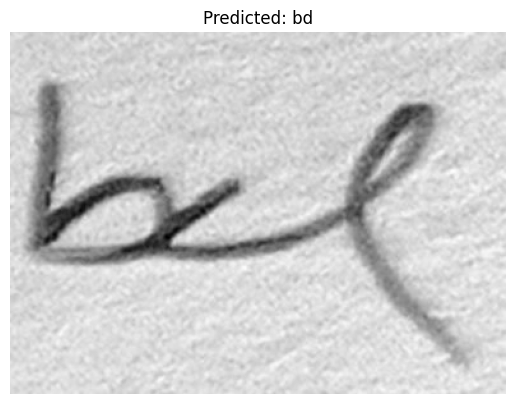

1/1 [==============================] - 0s 23ms/step


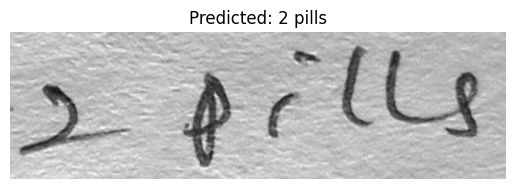

1/1 [==============================] - 0s 25ms/step


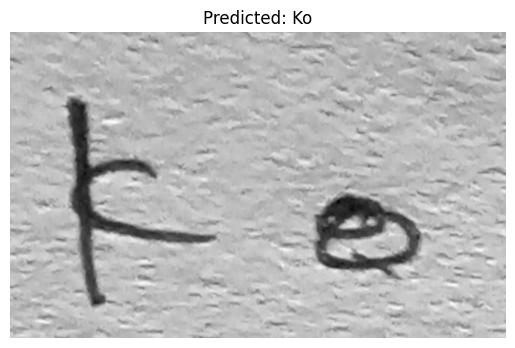

1/1 [==============================] - 0s 23ms/step


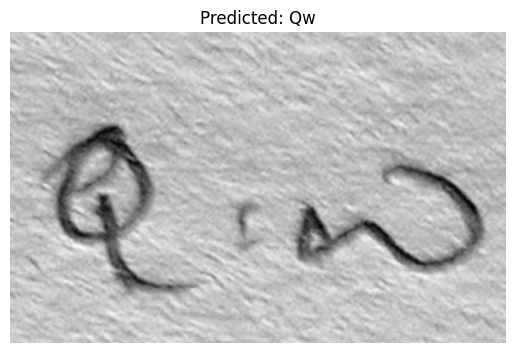

1/1 [==============================] - 0s 24ms/step


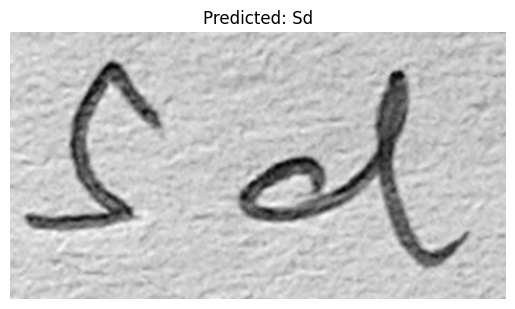

1/1 [==============================] - 0s 26ms/step


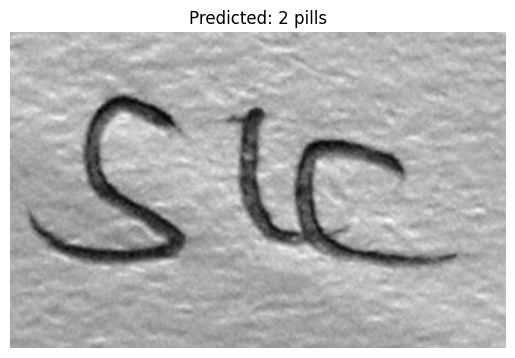

1/1 [==============================] - 0s 24ms/step


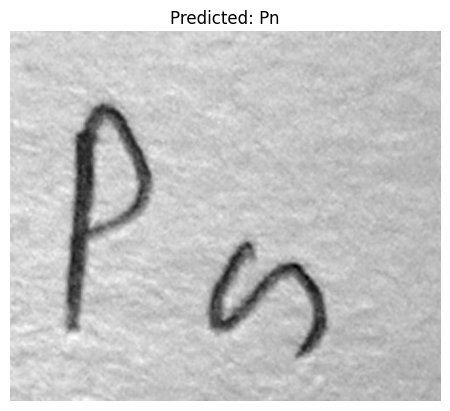

1/1 [==============================] - 0s 27ms/step


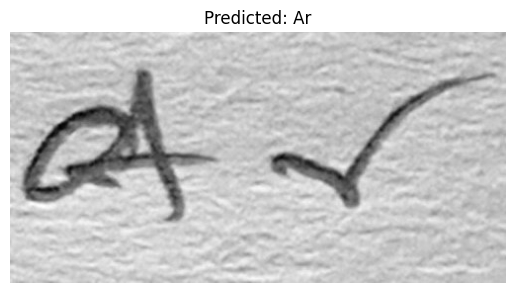

1/1 [==============================] - 0s 23ms/step


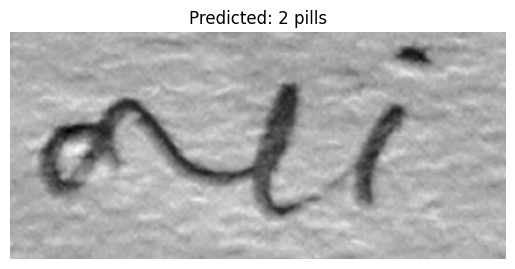

1/1 [==============================] - 0s 23ms/step


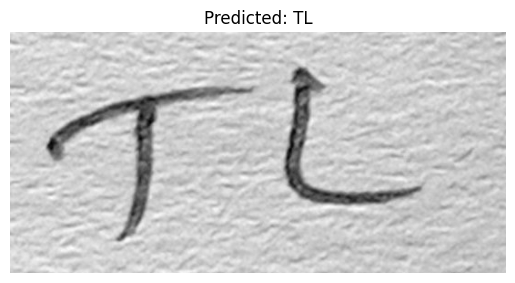

1/1 [==============================] - 0s 27ms/step


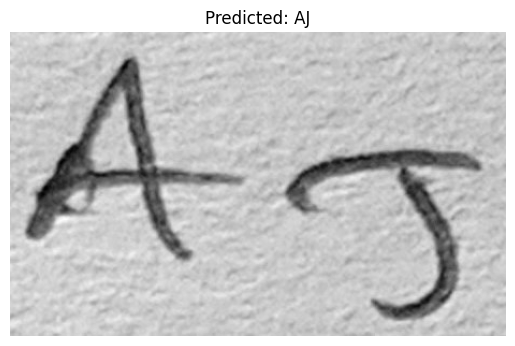

1/1 [==============================] - 0s 31ms/step


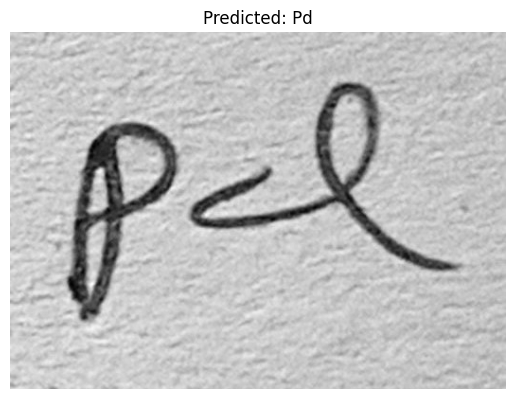

1/1 [==============================] - 0s 27ms/step


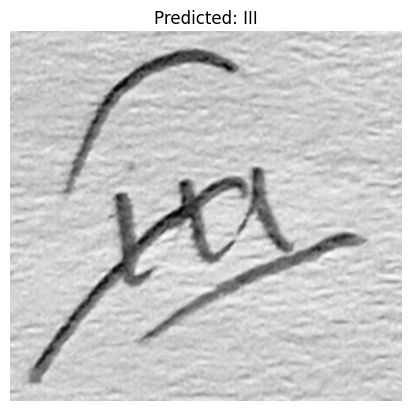

1/1 [==============================] - 0s 35ms/step


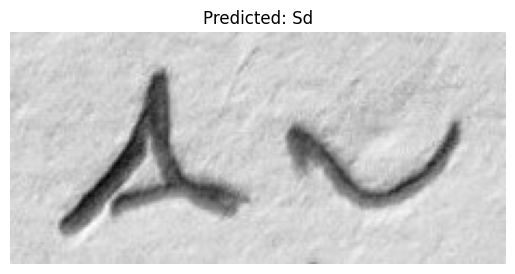

1/1 [==============================] - 0s 34ms/step


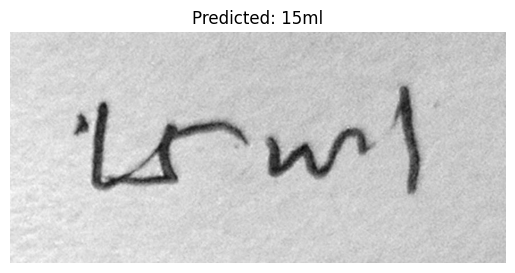

1/1 [==============================] - 0s 29ms/step


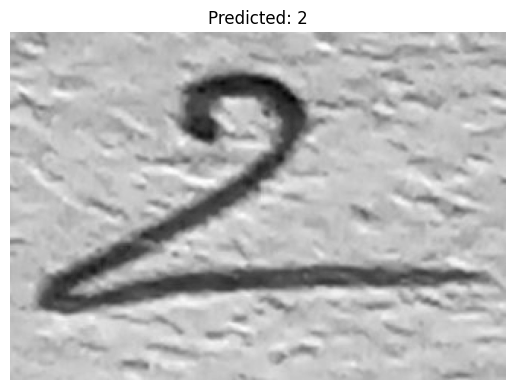

1/1 [==============================] - 0s 25ms/step


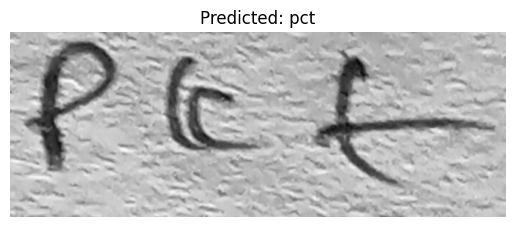

1/1 [==============================] - 0s 41ms/step


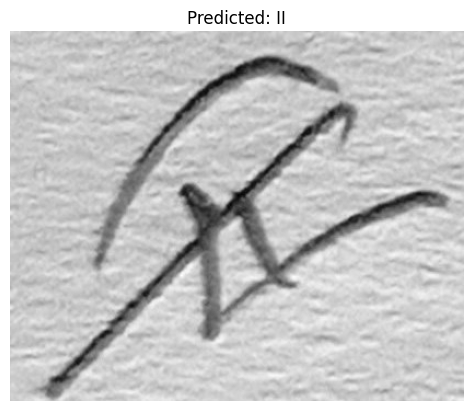

1/1 [==============================] - 0s 36ms/step


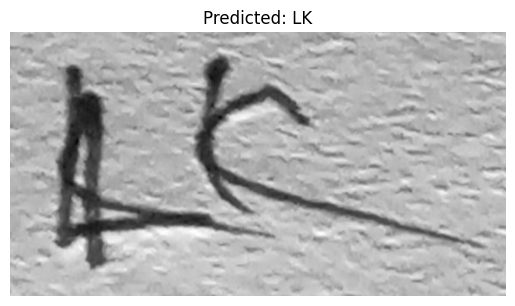

1/1 [==============================] - 0s 28ms/step


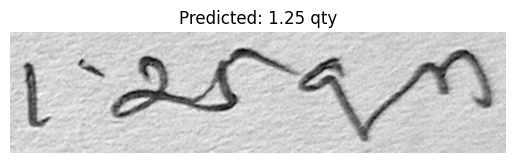

1/1 [==============================] - 0s 31ms/step


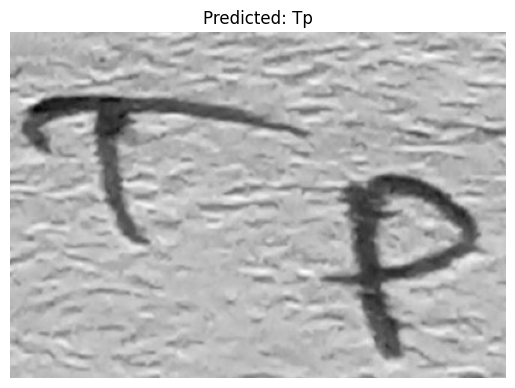

1/1 [==============================] - 0s 27ms/step


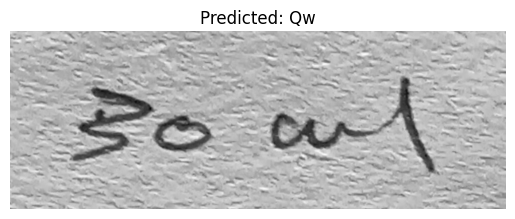

1/1 [==============================] - 0s 29ms/step


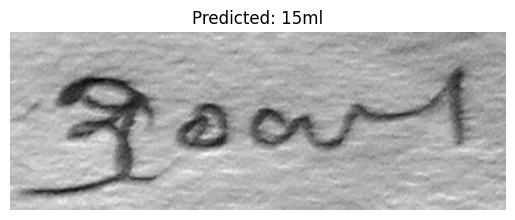

1/1 [==============================] - 0s 30ms/step


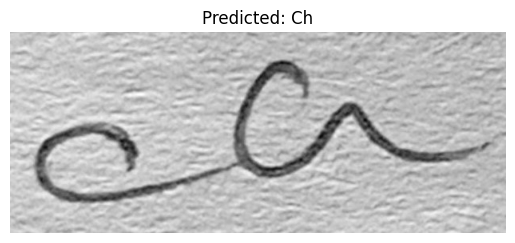

1/1 [==============================] - 0s 28ms/step


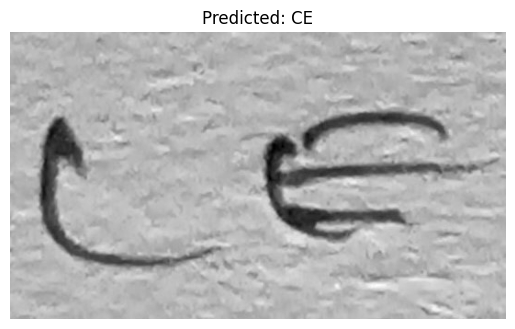

1/1 [==============================] - 0s 31ms/step


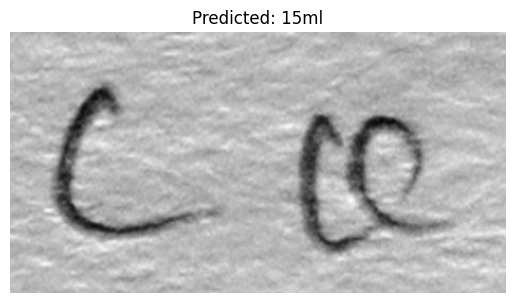

1/1 [==============================] - 0s 30ms/step


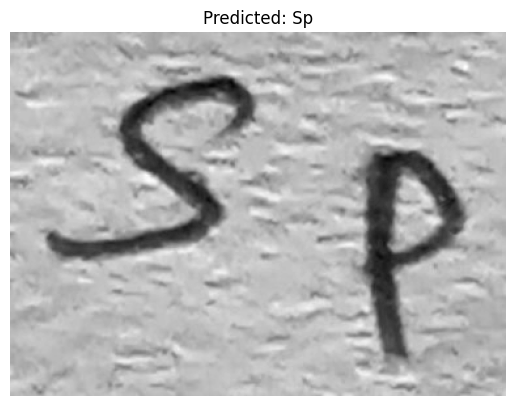

1/1 [==============================] - 0s 32ms/step


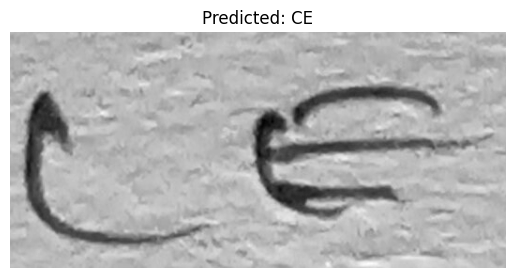

1/1 [==============================] - 0s 32ms/step


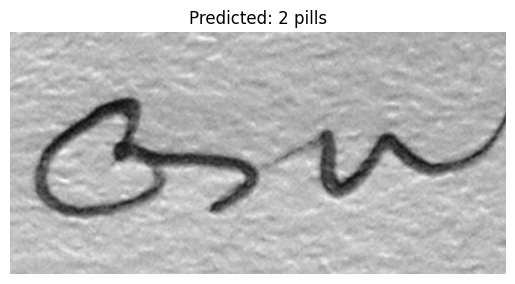

1/1 [==============================] - 0s 33ms/step


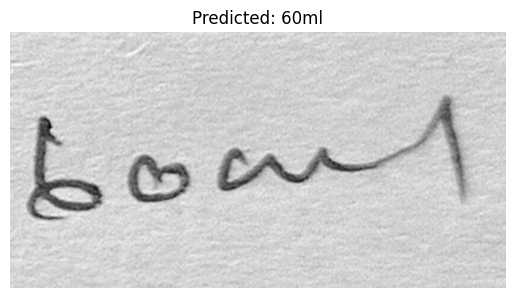

1/1 [==============================] - 0s 33ms/step


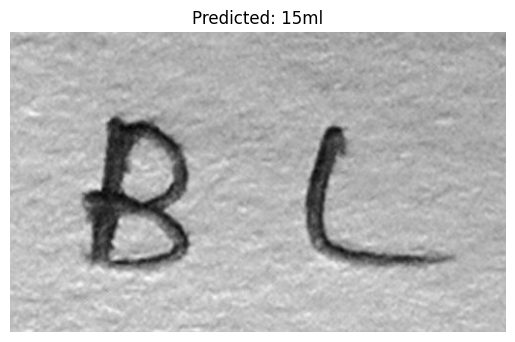

1/1 [==============================] - 0s 46ms/step


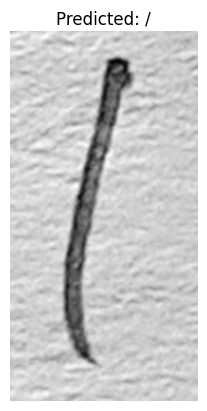

1/1 [==============================] - 0s 59ms/step


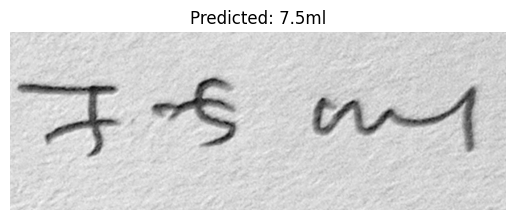

1/1 [==============================] - 0s 37ms/step


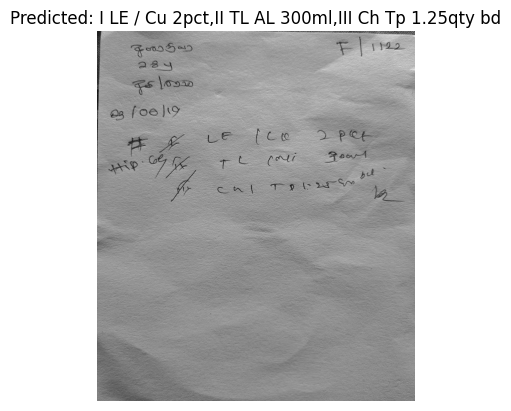

1/1 [==============================] - 0s 43ms/step


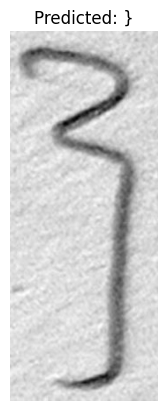

1/1 [==============================] - 0s 40ms/step


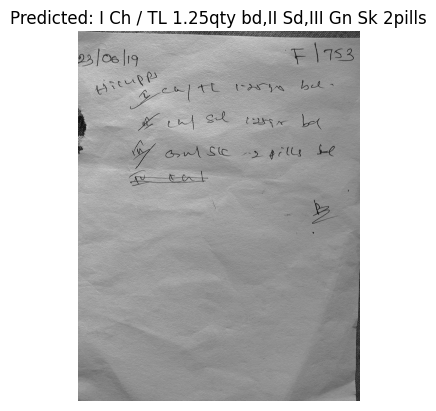

1/1 [==============================] - 0s 31ms/step


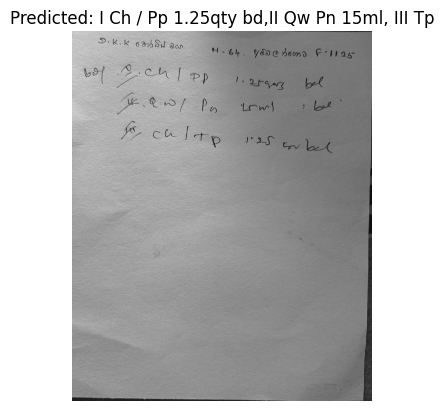

1/1 [==============================] - 0s 23ms/step


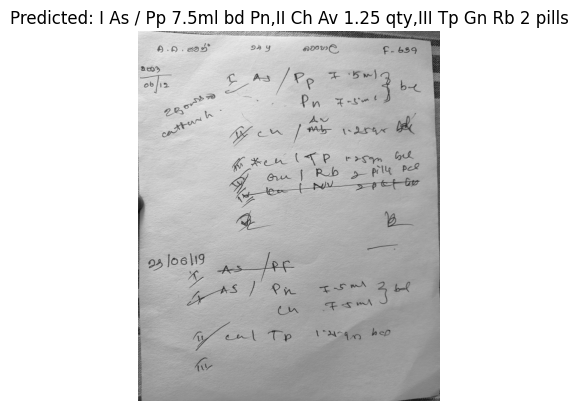

1/1 [==============================] - 0s 23ms/step


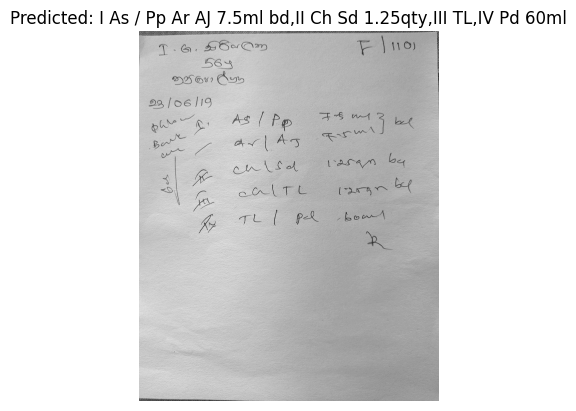

1/1 [==============================] - 0s 23ms/step


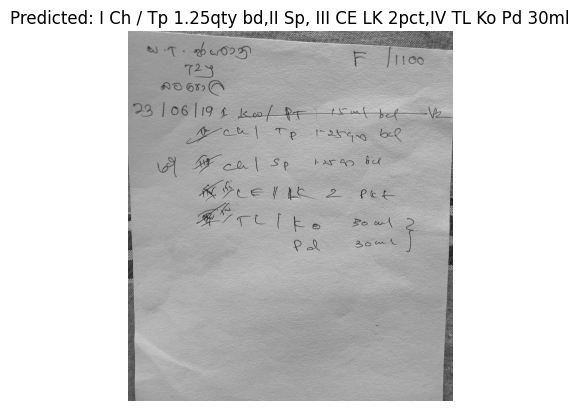

1/1 [==============================] - 0s 25ms/step


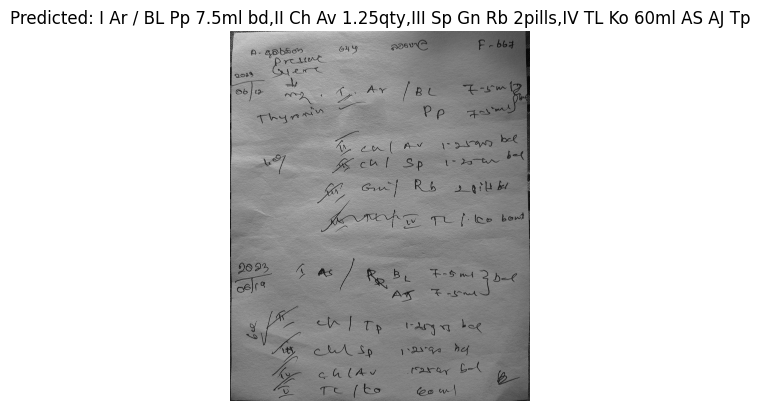

1/1 [==============================] - 0s 35ms/step


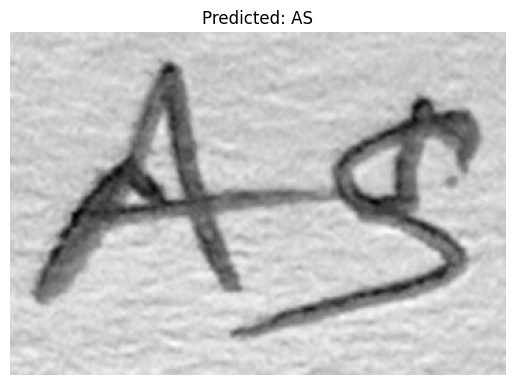

1/1 [==============================] - 0s 56ms/step


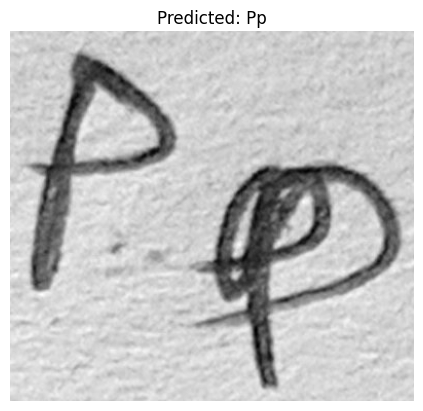

1/1 [==============================] - 0s 75ms/step


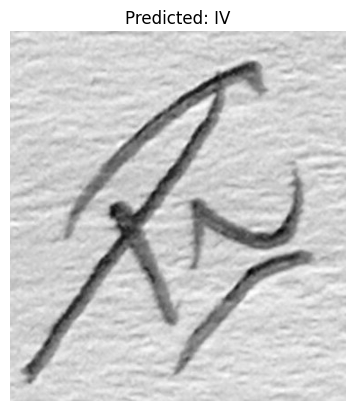

['1.25 qty', 'I', 'bd', '2 pills', 'Ko', 'Qw', 'Sd', '2 pills', 'Pn', 'Ar', '2 pills', 'TL', 'AJ', 'Pd', 'III', 'Sd', '15ml', '2', 'pct', 'II', 'LK', '1.25 qty', 'Tp', 'Qw', '15ml', 'Ch', 'CE', '15ml', 'Sp', 'CE', '2 pills', '60ml', '15ml', '/', '7.5ml', 'I LE / Cu 2pct,II TL AL 300ml,III Ch Tp 1.25qty bd', '}', 'I Ch / TL 1.25qty bd,II Sd,III Gn Sk 2pills', 'I Ch / Pp 1.25qty bd,II Qw Pn 15ml, III Tp', 'I As / Pp 7.5ml bd Pn,II Ch Av 1.25 qty,III Tp Gn Rb 2 pills', 'I As / Pp Ar AJ 7.5ml bd,II Ch Sd 1.25qty,III TL,IV Pd 60ml', 'I Ch / Tp 1.25qty bd,II Sp, III CE LK 2pct,IV TL Ko Pd 30ml', 'I Ar / BL Pp 7.5ml bd,II Ch Av 1.25qty,III Sp Gn Rb 2pills,IV TL Ko 60ml AS AJ Tp', 'AS', 'Pp', 'IV']


In [39]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Assuming img_size_w, img_size_h, model, and label_encoder are defined as before
# dir is the path to the directory containing all the images you want to predict
dir = '/content/drive/MyDrive/Notebooks/OCR_course/data/dataset'

predicted_values = []

# Set a common figure size for visualization
plt.figure(figsize=(8, 6))

for img_name in os.listdir(dir):
    # Load and preprocess the image
    img_path = os.path.join(dir, img_name)
    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size_w, img_size_h))
    array = new_array.reshape(-1, img_size_w, img_size_h, 1)

    # Make prediction using the model
    pred = model.predict(array)

    # Get the predicted class index
    y = np.argmax(pred)

    # Get the corresponding class label from label_encoder.classes_
    predicted_class = label_encoder.classes_[y]

    # Append the predicted class label to the list
    predicted_values.append(predicted_class)

    # Visualize the image with the predicted label
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

print(predicted_values)


1/1 [==============================] - 0s 40ms/step


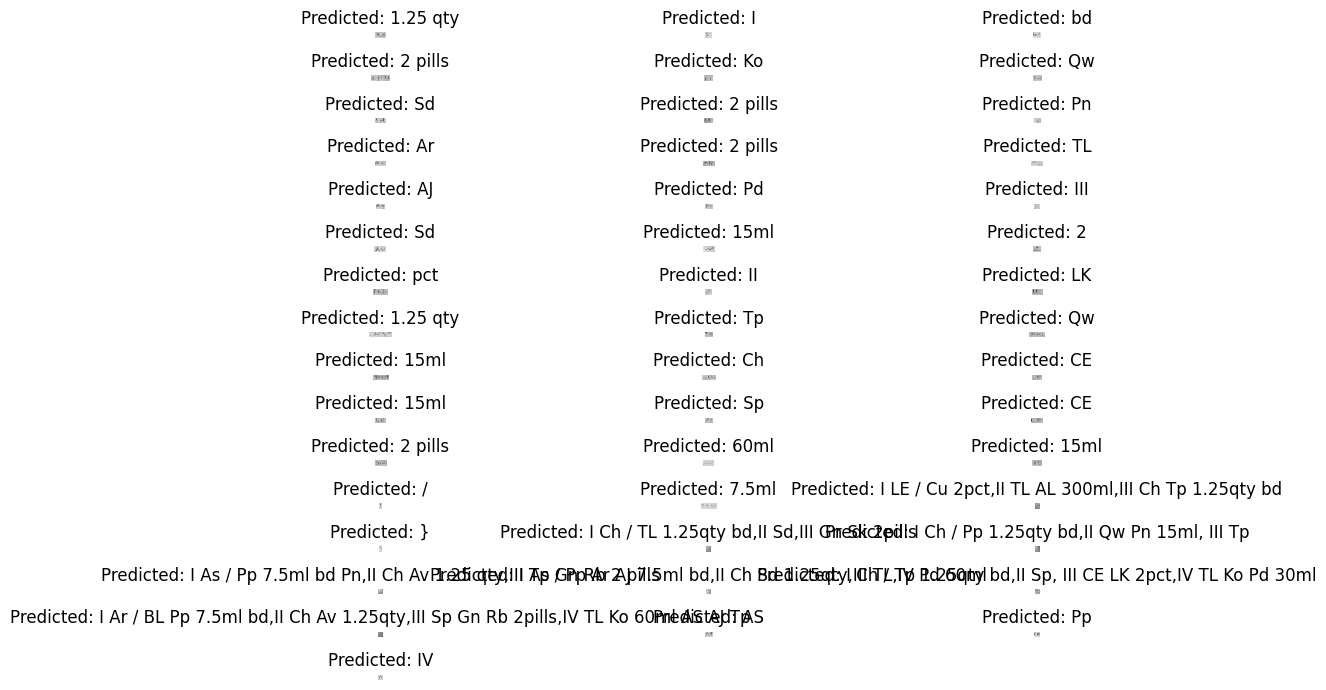

['1.25 qty', 'I', 'bd', '2 pills', 'Ko', 'Qw', 'Sd', '2 pills', 'Pn', 'Ar', '2 pills', 'TL', 'AJ', 'Pd', 'III', 'Sd', '15ml', '2', 'pct', 'II', 'LK', '1.25 qty', 'Tp', 'Qw', '15ml', 'Ch', 'CE', '15ml', 'Sp', 'CE', '2 pills', '60ml', '15ml', '/', '7.5ml', 'I LE / Cu 2pct,II TL AL 300ml,III Ch Tp 1.25qty bd', '}', 'I Ch / TL 1.25qty bd,II Sd,III Gn Sk 2pills', 'I Ch / Pp 1.25qty bd,II Qw Pn 15ml, III Tp', 'I As / Pp 7.5ml bd Pn,II Ch Av 1.25 qty,III Tp Gn Rb 2 pills', 'I As / Pp Ar AJ 7.5ml bd,II Ch Sd 1.25qty,III TL,IV Pd 60ml', 'I Ch / Tp 1.25qty bd,II Sp, III CE LK 2pct,IV TL Ko Pd 30ml', 'I Ar / BL Pp 7.5ml bd,II Ch Av 1.25qty,III Sp Gn Rb 2pills,IV TL Ko 60ml AS AJ Tp', 'AS', 'Pp', 'IV']


In [40]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Assuming img_size_w, img_size_h, model, and label_encoder are defined as before
# dir is the path to the directory containing all the images you want to predict
dir = '/content/drive/MyDrive/Notebooks/OCR_course/data/dataset'

# Define the size of the grid (3 rows x n_cols)
n_cols = 3

# Initialize an empty list to store the predicted values
predicted_values = []

# Get the number of images in the directory
num_images = len(os.listdir(dir))

# Calculate the number of rows required for the grid
n_rows = (num_images + n_cols - 1) // n_cols

# Create a new figure
plt.figure(figsize=(10, 7))

for idx, img_name in enumerate(os.listdir(dir)):
    # Load and preprocess the image
    img_path = os.path.join(dir, img_name)
    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size_w, img_size_h))
    array = new_array.reshape(-1, img_size_w, img_size_h, 1)

    # Make prediction using the model
    pred = model.predict(array)

    # Get the predicted class index
    y = np.argmax(pred)

    # Get the corresponding class label from label_encoder.classes_
    predicted_class = label_encoder.classes_[y]

    # Append the predicted class label to the list
    predicted_values.append(predicted_class)

    # Plot the image with the predicted label in a subplot
    plt.subplot(n_rows, n_cols, idx + 1)
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

print(predicted_values)
